<h2>UMELÉ NEURÓNOVÉ SIETE</h2>

Zo stránky https://www.superdatascience.com/machine-learning/ stiahneme súbor <strong>Machine Learning A-Z (Codes and Datasets).zip</strong>.

Z tohto archívu nás zaujíma súbor <strong>Churn_Modelling.csv</strong>, nájdeme v ňom teda tento súbor (je v <em>Part 8: Deep Learning - Section 39 - Artificial Neural Networks (ANN)</em>). Dáme ho do priečinka, kde sa nachádza aj tento notebook (ipynb súbor). Budú teda v tom istom priečinku. Nakoľko csv súbory Excel nie vždy otvára správne, otvoríme ho priamo v JupyterLab alebo Google Colab alebo online pomocou stránky https://limonte.github.io/csv-viewer-online/ .

V tejto tabuľke sa nachádzajú údaje o klientoch banky. Závislou premennou je fakt, či daný klient banky z nej neskôr odišiel alebo nie. Ide teda o typický príklad problému klasifikácie do 2 tried. Pokročilou metódou klasifikácie je využitie umelých neurónových sietí.

Nasleduje inštalácia knižníc, ktorú nerobíme, ak pracujeme s Google Colab.

Potrebujeme najprv nainštalovať knižnicu <strong>Theano</strong>, ktorá je určená pre numerické operácie, podobne ako Numpy, ktorú sme už používali. Výhodou je, že vie na tieto operácie využiť aj GPU.

Otvoríme si teda balíčkový systém Anacondy, vyhľadáme Theano a nainštalujeme ho (keby nám ho nenašlo, zatlačíme <em>Update index</em>):<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_3.png" />

Potrebujeme nainštalovať knižnicu <strong>Tensorflow</strong>, o ktorej si môžeme viac prečítať na webe. Práca s ňou je pomerne zložitá a je vhodná na výskum. Prejdeme teda podobným spôsobom na balíčkový systém Anacondy a vyberieme TensorFlow <em>(verziu pre CPU, nakoľko GPU verzia môže požadovať inštaláciu CUDA a ďalších komponentov)</em>:<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_4.png" />

Nainštalujeme pomocou Anaconda balíčkového systému knižnicu <strong>Keras</strong>, ktorá slúži na zjednodušenú tvorbu neurónových sietí pomocou Tensorflow::<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_5.png" />

Spustíme kód, ktorý nám importuje potrebné knižnice a vypíše, akú máme nainštalovanú verziu Tensorflow. Toto už robíme aj v prípade, že pracujeme s Google Colab.

In [43]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.10.1'

Importujeme náš dataset. Vidíme, že je logické, že prvé 3 stĺpce, ako sú <em>RowNumber</em>, <em>CustomerId</em> a <em>Surname</em> nám nijakým spôsobom nemôžu vplývať na výstup. Preto berieme do úvahy v premennej <strong><em>X</em></strong> len stĺpce s indexom 3 až 12. Riadok s <strong><em>y</em></strong> musíme logicky upraviť nasledovne, keďže závislé údaje sú v stĺpci s indexom 13:

In [44]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

Po tomto kóde pridáme kód na spracovanie kategorických dát. Vidíme, že potrebujeme spracovať pohlavie <em>Male / Female</em>. Toto nám stačí prepísať na 0 / 1. Využijeme teda <em>LabelEncoder</em>.

In [45]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:, 2])

Po tomto kóde pridáme ďalší kód na spracovanie kategorických dát. Vidíme, že potrebujeme nejakým spôsobom spracovať krajiny, ktoré máme 3. Keďže medzi nimi neexistuje žiaden vzťah, ktorý by sa týkal ich poradia a sú 3, tak použijeme <em>OneHotEncoder</em>:

In [46]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Realizujeme škálovanie (<em>Feature Scaling</em>) našich nezávislých premenných, pričom zahrnieme všetky:

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Riadok s rozdeľovaním dát na trénovacie a testovacie zadáme tak, aby testovacie dáta tvorili pätinu datasetu:

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Práca s neurónovou sieťou pozostáva z nasledovných krokov.
<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_6.png" />
<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_7.png" />
<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_8.png" />
<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_9.png" />
<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_10.png" />

Inicializujeme neurónovú sieť:

In [49]:
# Initialising the ANN
ann = tf.keras.models.Sequential()

Pridáme prvú vrstvu, teda vstupnú vrstvu, kde počet neurónov bude taký, aký máme počet našich príznakov, teda nezávislých premenných, čo vidíme v <em>input dimension</em> nastavených na 12. Toto je nepovinný parameter a automaticky by sa nám nastavil na 12. Typ vrstvy je <em>Dense</em>, čo je plne prepojená vrstva. Ako aktivačnú funkciu sme si vybrali <strong><em>relu</em></strong>, ktorá je na vstupnú vrstvu vhodná. Zároveň pridávame týmto aj prvú skrytú vrstvu, ktorej dávame 6 neurónov. Môže sa táto logika zdať zvláštna, že pomocou jedného príkazu pridávame 2 vrstvy, ale je to tak. Toto číslo môžeme neskôr skusmo meniť:

In [50]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim=12))

Pridáme ďalšiu skrytú vrstvu:

In [51]:
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Pridáme výstupnú vrstvu, kde počet výstupných neurónov bude 1, nakoľko výstupná vrstva nám bude určovať, či zákazník z banky odišiel alebo nie, čo je binárny výstup 0 alebo 1. Aktivačná funkcia je do výstupnej funkcie vhodná <em><strong>sigmoid</em></strong>. Ak by sme mali viac kategórií, tak je vhodné využiť <em><strong>softmax</em></strong>.

In [52]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Neurónovú sieť skompilujeme. Loss nastavujeme na <em><strong>binary_crossentropy</em></strong>, nakoľko máme binárny výstup. Ak by sme mali viac kategórií, tak využijeme <em><strong>categorical_crossentropy</em></strong>.

In [53]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Neurónovú sieť natrénujeme, počet epoch nastavíme na 100. Nezabudnime, že ak chceme skúšať sieť s inými parametrami, tak musíme zmazať všetky dáta v pamäti, ktoré sa týkajú neurónovej siete a spustiť jej inicializáciu znova, nakoľko to vyzerá, že JupyterLab si pamätá predošlé natrénovanie:

In [54]:
# Fitting the ANN to the Training set
ann1 = ann.fit(X_train, y_train, validation_data = (X_test, y_test),  batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5232 - accuracy: 0.7960 - val_loss: 0.4928 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7960 - val_loss: 0.4619 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.7960 - val_loss: 0.4451 - val_accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.7960 - val_loss: 0.4352 - val_accuracy: 0.7975
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.7987 - val_loss: 0.4300 - val_accuracy: 0.8130
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8123 - val_loss: 0.4264 - val_accuracy: 0.8175
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8171 - val_loss: 0.4238 - val_accuracy: 0.8255

Program spustíme a sledujeme priebeh trénovania.

Zobrazíme si priebeh trénovania neurónovej siete pomocou zobrazenia presnosti. <em>Accuracy</em> je presnosť pre trénovaciu množinu a <em>val_accuracy</em> je presnosť pre testovaciu (validačnú) množinu. Ak je presnosť pre trénovaciu množinu veľmi vysoká, avšak nízka pre testovaciu, znamená to, že sieť je pretrénovaná (<strong>overfitting</strong>).

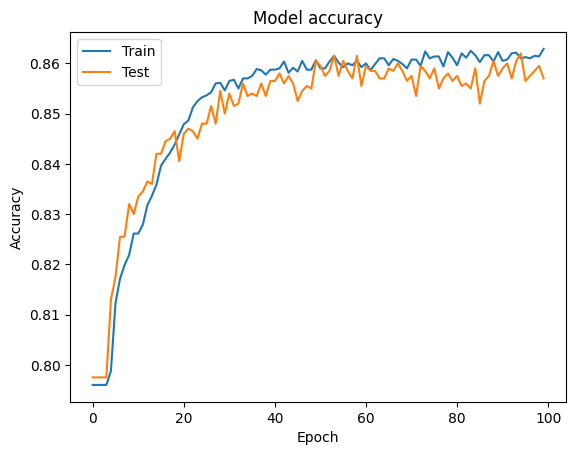

In [55]:
import matplotlib.pyplot as plt
plt.plot(ann1.history['accuracy'])
plt.plot(ann1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Zobrazíme si priebeh trénovania neurónovej siete pomocou zobrazenia loss:

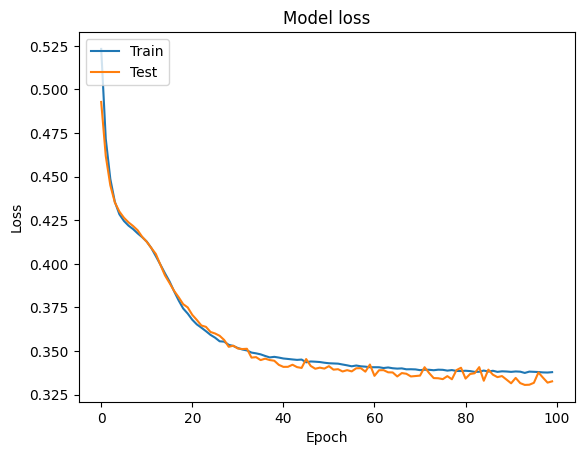

In [56]:
plt.plot(ann1.history['loss'])
plt.plot(ann1.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


Skúsme predikovať výsledok, teda či odíde z banky človek, ktorý má nasledovné parametre:<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_11.png" />

Toto realizujeme pomocou kódu:

In [57]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))

1/1 [==============================] - 0s 57ms/step
[[0.02944818]]


Ideme predikovať výsledky na základe testovacích dát. Predposledný riadok nám urobí to, že výsledky väčšie ako 0.5 označí ako <strong>True</strong> a ostatné ako <strong>False</strong>.

In [58]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 718us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Znovu vyrobíme confusion matrix. Kód potom spustíme a pozrieme obsah confusion matrix, ktorej obsahu sme sa naučili rozumieť pri logistickej regresii.

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print (cm)
accuracy_score(y_test, y_pred)

[[1509   86]
 [ 200  205]]


0.857

Program je hotový. Prečítame si a <strong>splníme úlohu</strong> na konci nášho dokumentu k cvičeniu.

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 0.7088 - accuracy: 0.3700 - val_loss: 0.7115 - val_accuracy: 0.3200
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.3833 - val_loss: 0.6924 - val_accuracy: 0.3200
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6761 - accuracy: 0.3933 - val_loss: 0.6751 - val_accuracy: 0.3500
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6620 - accuracy: 0.4367 - val_loss: 0.6599 - val_accuracy: 0.3700
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.4500 - val_loss: 0.6462 - val_accuracy: 0.3900
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.5067 - val_loss: 0.6348 - val_accuracy: 0.4600
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.5267 - val_loss: 0.6249 - val_accuracy: 0.4700
Epoch 8/100


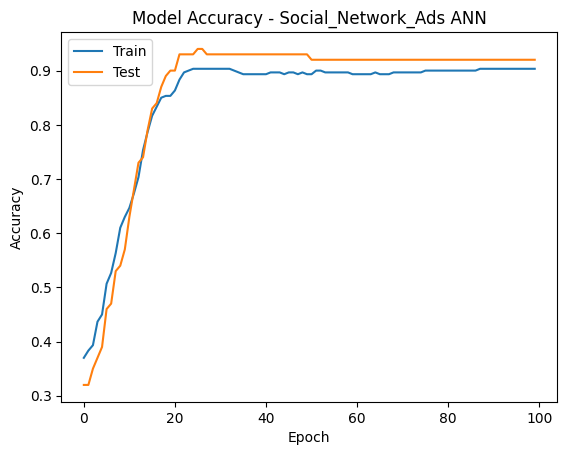

4/4 [==============================] - 0s 999us/step
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
Confusion Matrix pre Social_Network_Ads - Umela Neuronova Siet:
[[64  4]
 [ 4 28]]
Accuracy: 0.92



In [60]:
# 2. Dataset: Social_Network_Ads.csv - Umela Neuronova Siet
# Nacitanie datasetu
dataset_ads = pd.read_csv("Social_Network_Ads.csv")
X_ads = dataset_ads.iloc[:, [2, 3]].values
y_ads = dataset_ads.iloc[:, 4].values

# Rozdelenie datasetu na trenovaciu a testovaciu mnozinu
X_train_ads, X_test_ads, y_train_ads, y_test_ads = train_test_split(
    X_ads, y_ads, test_size=0.25, random_state=0
)

# Feature Scaling
sc_ads = StandardScaler()
X_train_ads = sc_ads.fit_transform(X_train_ads)
X_test_ads = sc_ads.transform(X_test_ads)

# Inicializacia ANN
ann_ads = tf.keras.models.Sequential()
ann_ads.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=2))
ann_ads.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann_ads.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Kompilacia ANN
ann_ads.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Trening ANN
ann_history_ads = ann_ads.fit(
    X_train_ads,
    y_train_ads,
    validation_data=(X_test_ads, y_test_ads),
    batch_size=32,
    epochs=100,
)

# Graf trenovania pre ANN
plt.plot(ann_history_ads.history["accuracy"])
plt.plot(ann_history_ads.history["val_accuracy"])
plt.title("Model Accuracy - Social_Network_Ads ANN")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

# Predikcia vysledkov pre testovaciu mnozinu pomocou ANN
y_pred_ads_ann = ann_ads.predict(X_test_ads)
y_pred_ads_ann = y_pred_ads_ann > 0.5
print(
    np.concatenate(
        (
            y_pred_ads_ann.reshape(len(y_pred_ads_ann), 1),
            y_test_ads.reshape(len(y_test_ads), 1),
        ),
        1,
    )
)

# Confusion Matrix a accuracy score pre ANN
cm_ads_ann = confusion_matrix(y_test_ads, y_pred_ads_ann)
accuracy_ads_ann = accuracy_score(y_test_ads, y_pred_ads_ann)
print("Confusion Matrix pre Social_Network_Ads - Umela Neuronova Siet:")
print(cm_ads_ann)
print(f"Accuracy: {accuracy_ads_ann}\n")